# Data cleaning

In [1]:
import pandas as pd
import numpy as np
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter, StrMethodFormatter
import missingno as msno
pd.set_option("display.max_columns", None)
pd.set_option("display.float_format", lambda x: "%.2f" % x)


In [2]:
# Load csv file, parse month column as datetime
csv = pd.read_csv(r"data_files\steam_charts_combined.csv", parse_dates=["month"])
csv.head()


,month,average_players,peak_players,app_id,game,player_gain,player_gain_percentage,short_description,required_age,dlc,supported_languages,developers,publishers,platforms,categories,genres,achievements,release_date,supported_audio,coming_soon,price_usd,review_score,total_positive,total_negative,rating,owners,average_forever,median_forever,tags,metacritic_score,metacritic_url,is_recurring_subscription
0,2022-06-30,570825.94,923996,730,Counter-Strike: Global Offensive,5864.20,1.04,Counter-Strike: Global Offensive (CS: GO) expa...,0.00,[1766730],"['Bulgarian', 'Czech', 'Danish', 'Dutch', 'Eng...","['Valve', 'Hidden Path Entertainment']",['Valve'],"['windows', 'mac', 'linux']","['Multi-player', 'Steam Achievements', 'Full c...","['Action', 'Free to Play']",167.00,2012-08-21,[' English'],False,0.00,8.00,2949363.00,439344.00,86.63,50000000-100000000,30053.00,6104.00,"['FPS', 'Shooter', 'Multiplayer', 'Competitive...",83.00,https://www.metacritic.com/game/pc/counter-str...,False
1,2022-05-31,564961.70,923996,730,Counter-Strike: Global Offensive,-4021.46,-0.71,Counter-Strike: Global Offensive (CS: GO) expa...,0.00,[1766730],"['Bulgarian', 'Czech', 'Danish', 'Dutch', 'Eng...","['Valve', 'Hidden Path Entertainment']",['Valve'],"['windows', 'mac', 'linux']","['Multi-player', 'Steam Achievements', 'Full c...","['Action', 'Free to Play']",167.00,2012-08-21,[' English'],False,0.00,8.00,2949363.00,439344.00,86.63,50000000-100000000,30053.00,6104.00,"['FPS', 'Shooter', 'Multiplayer', 'Competitive...",83.00,https://www.metacritic.com/game/pc/counter-str...,False
2,2022-04-30,568983.16,1013237,730,Counter-Strike: Global Offensive,-12506.53,-2.15,Counter-Strike: Global Offensive (CS: GO) expa...,0.00,[1766730],"['Bulgarian', 'Czech', 'Danish', 'Dutch', 'Eng...","['Valve', 'Hidden Path Entertainment']",['Valve'],"['windows', 'mac', 'linux']","['Multi-player', 'Steam Achievements', 'Full c...","['Action', 'Free to Play']",167.00,2012-08-21,[' English'],False,0.00,8.00,2949363.00,439344.00,86.63,50000000-100000000,30053.00,6104.00,"['FPS', 'Shooter', 'Multiplayer', 'Competitive...",83.00,https://www.metacritic.com/game/pc/counter-str...,False
3,2022-03-31,581489.69,987993,730,Counter-Strike: Global Offensive,-53148.71,-8.37,Counter-Strike: Global Offensive (CS: GO) expa...,0.00,[1766730],"['Bulgarian', 'Czech', 'Danish', 'Dutch', 'Eng...","['Valve', 'Hidden Path Entertainment']",['Valve'],"['windows', 'mac', 'linux']","['Multi-player', 'Steam Achievements', 'Full c...","['Action', 'Free to Play']",167.00,2012-08-21,[' English'],False,0.00,8.00,2949363.00,439344.00,86.63,50000000-100000000,30053.00,6104.00,"['FPS', 'Shooter', 'Multiplayer', 'Competitive...",83.00,https://www.metacritic.com/game/pc/counter-str...,False
4,2022-02-28,634638.40,995163,730,Counter-Strike: Global Offensive,32262.13,5.36,Counter-Strike: Global Offensive (CS: GO) expa...,0.00,[1766730],"['Bulgarian', 'Czech', 'Danish', 'Dutch', 'Eng...","['Valve', 'Hidden Path Entertainment']",['Valve'],"['windows', 'mac', 'linux']","['Multi-player', 'Steam Achievements', 'Full c...","['Action', 'Free to Play']",167.00,2012-08-21,[' English'],False,0.00,8.00,2949363.00,439344.00,86.63,50000000-100000000,30053.00,6104.00,"['FPS', 'Shooter', 'Multiplayer', 'Competitive...",83.00,https://www.metacritic.com/game/pc/counter-str...,False


In [3]:
csv.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52284 entries, 0 to 52283
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   month                      52284 non-null  datetime64[ns]
 1   average_players            52284 non-null  float64       
 2   peak_players               52284 non-null  int64         
 3   app_id                     52284 non-null  int64         
 4   game                       52284 non-null  object        
 5   player_gain                52284 non-null  float64       
 6   player_gain_percentage     52284 non-null  float64       
 7   short_description          47466 non-null  object        
 8   required_age               47466 non-null  float64       
 9   dlc                        29870 non-null  object        
 10  supported_languages        47466 non-null  object        
 11  developers                 47466 non-null  object        
 12  publ

In [4]:
# Percent of missing data, sorted descending order
(csv.apply(pd.isnull).sum()/csv.shape[0] * 100).sort_values(ascending=False)

metacritic_url              50.42
metacritic_score            50.42
dlc                         42.87
supported_audio             41.84
is_recurring_subscription   23.52
price_usd                   10.21
tags                         9.97
release_date                 9.87
genres                       9.66
median_forever               9.22
average_forever              9.22
owners                       9.22
total_negative               9.22
total_positive               9.22
review_score                 9.22
coming_soon                  9.22
rating                       9.22
achievements                 9.22
categories                   9.22
platforms                    9.22
publishers                   9.22
developers                   9.22
supported_languages          9.22
required_age                 9.22
short_description            9.22
average_players              0.00
player_gain_percentage       0.00
player_gain                  0.00
game                         0.00
app_id        

<AxesSubplot:>

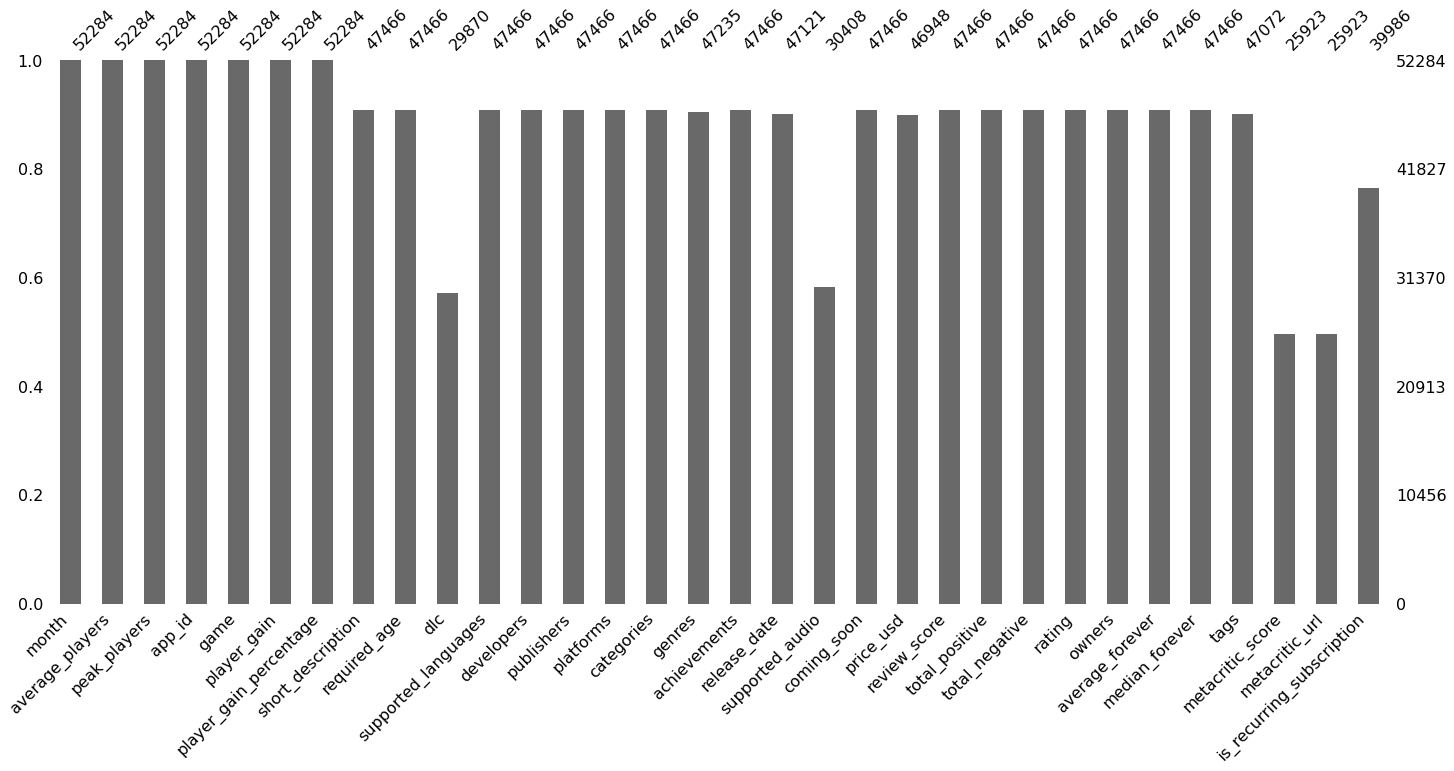

In [5]:
msno.bar(csv)

### Missing data for metacritic scores

About 50% of entries are missing data for the metacritic score. The `app_id`s that belong to entries on the main dataframe are missing on the metacritic dataset. While many of these games are missing data for metacritic scores, they do have ratings on the website. 

While I could manually replace every game with the appropriate metacritic score, it's not practical, nor is it neccessary. There are two other columns that describe game ratings: `review_score` and `rating`. The easiest solution will be to fill in missing data with either the mean (average) or median (middle) metacritic score.

In [6]:
# Missing metacritic data
missing_scores = csv[csv["metacritic_score"].isnull()][["month","game"]]

In [7]:
# Non-missing scores
csv[~csv["metacritic_score"].isnull()][["month","game","metacritic_score"]].sample(10)

,month,game,metacritic_score
39810,2020-03-31,Dishonored,91.00
2432,2020-07-31,Monster Hunter: World,88.00
11900,2021-03-31,Darkest Dungeon®,84.00
32205,2020-06-30,Mass Effect™: Andromeda,72.00
39807,2020-06-30,Dishonored,91.00
51772,2020-09-30,Transport Fever,71.00
6685,2018-06-30,Assetto Corsa,85.00
51381,2021-10-31,Friday the 13th: The Game,61.00
21482,2019-01-31,Slime Rancher,81.00
52122,2015-09-30,Command and Conquer: Red Alert 3 - Uprising,64.00


In [8]:
# Mean, standard deviation, and median values
csv["metacritic_score"].describe()

count   25923.00
mean       81.23
std         7.72
min        56.00
25%        77.00
50%        82.00
75%        87.00
max        97.00
Name: metacritic_score, dtype: float64

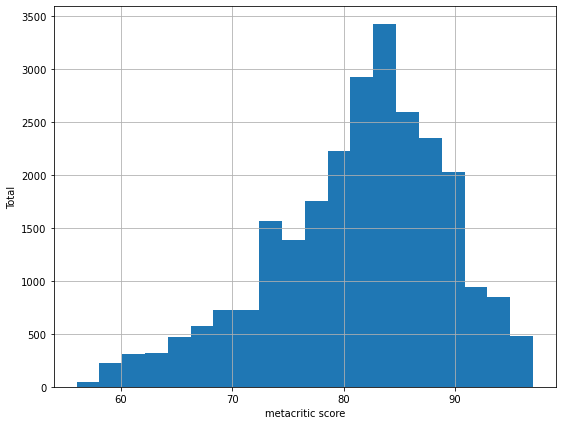

In [9]:
# Metacritic score histogram
plt.figure(figsize=(9,7))
csv["metacritic_score"].hist(bins=20)
plt.xlabel("metacritic score")
plt.ylabel("Total")
plt.show()

In [10]:
# Fill in missing metacritic scores with average score
csv["metacritic_score"] = csv["metacritic_score"].fillna(csv["metacritic_score"].mean())


In [11]:
csv.head()

,month,average_players,peak_players,app_id,game,player_gain,player_gain_percentage,short_description,required_age,dlc,supported_languages,developers,publishers,platforms,categories,genres,achievements,release_date,supported_audio,coming_soon,price_usd,review_score,total_positive,total_negative,rating,owners,average_forever,median_forever,tags,metacritic_score,metacritic_url,is_recurring_subscription
0,2022-06-30,570825.94,923996,730,Counter-Strike: Global Offensive,5864.20,1.04,Counter-Strike: Global Offensive (CS: GO) expa...,0.00,[1766730],"['Bulgarian', 'Czech', 'Danish', 'Dutch', 'Eng...","['Valve', 'Hidden Path Entertainment']",['Valve'],"['windows', 'mac', 'linux']","['Multi-player', 'Steam Achievements', 'Full c...","['Action', 'Free to Play']",167.00,2012-08-21,[' English'],False,0.00,8.00,2949363.00,439344.00,86.63,50000000-100000000,30053.00,6104.00,"['FPS', 'Shooter', 'Multiplayer', 'Competitive...",83.00,https://www.metacritic.com/game/pc/counter-str...,False
1,2022-05-31,564961.70,923996,730,Counter-Strike: Global Offensive,-4021.46,-0.71,Counter-Strike: Global Offensive (CS: GO) expa...,0.00,[1766730],"['Bulgarian', 'Czech', 'Danish', 'Dutch', 'Eng...","['Valve', 'Hidden Path Entertainment']",['Valve'],"['windows', 'mac', 'linux']","['Multi-player', 'Steam Achievements', 'Full c...","['Action', 'Free to Play']",167.00,2012-08-21,[' English'],False,0.00,8.00,2949363.00,439344.00,86.63,50000000-100000000,30053.00,6104.00,"['FPS', 'Shooter', 'Multiplayer', 'Competitive...",83.00,https://www.metacritic.com/game/pc/counter-str...,False
2,2022-04-30,568983.16,1013237,730,Counter-Strike: Global Offensive,-12506.53,-2.15,Counter-Strike: Global Offensive (CS: GO) expa...,0.00,[1766730],"['Bulgarian', 'Czech', 'Danish', 'Dutch', 'Eng...","['Valve', 'Hidden Path Entertainment']",['Valve'],"['windows', 'mac', 'linux']","['Multi-player', 'Steam Achievements', 'Full c...","['Action', 'Free to Play']",167.00,2012-08-21,[' English'],False,0.00,8.00,2949363.00,439344.00,86.63,50000000-100000000,30053.00,6104.00,"['FPS', 'Shooter', 'Multiplayer', 'Competitive...",83.00,https://www.metacritic.com/game/pc/counter-str...,False
3,2022-03-31,581489.69,987993,730,Counter-Strike: Global Offensive,-53148.71,-8.37,Counter-Strike: Global Offensive (CS: GO) expa...,0.00,[1766730],"['Bulgarian', 'Czech', 'Danish', 'Dutch', 'Eng...","['Valve', 'Hidden Path Entertainment']",['Valve'],"['windows', 'mac', 'linux']","['Multi-player', 'Steam Achievements', 'Full c...","['Action', 'Free to Play']",167.00,2012-08-21,[' English'],False,0.00,8.00,2949363.00,439344.00,86.63,50000000-100000000,30053.00,6104.00,"['FPS', 'Shooter', 'Multiplayer', 'Competitive...",83.00,https://www.metacritic.com/game/pc/counter-str...,False
4,2022-02-28,634638.40,995163,730,Counter-Strike: Global Offensive,32262.13,5.36,Counter-Strike: Global Offensive (CS: GO) expa...,0.00,[1766730],"['Bulgarian', 'Czech', 'Danish', 'Dutch', 'Eng...","['Valve', 'Hidden Path Entertainment']",['Valve'],"['windows', 'mac', 'linux']","['Multi-player', 'Steam Achievements', 'Full c...","['Action', 'Free to Play']",167.00,2012-08-21,[' English'],False,0.00,8.00,2949363.00,439344.00,86.63,50000000-100000000,30053.00,6104.00,"['FPS', 'Shooter', 'Multiplayer', 'Competitive...",83.00,https://www.metacritic.com/game/pc/counter-str...,False


In [12]:
# Most games appear to support audio in multiple languages
csv["supported_audio"].value_counts()

['English']                                                                                                                                                                                                                                                       12111
[' Japanese', 'English']                                                                                                                                                                                                                                            804
['English', 'French', 'German', 'Italian', 'Spanish - Spain']                                                                                                                                                                                                       654
['English', 'French', 'German']                                                                                                                                                                                 

### Minimum age required 

I couldn't expect the minimum age required to purchase a game to have too much impact on the overall player trends. Most players are more concerned with gameplay and graphics/visuals rather than the game's age rating. Since most of the values non-null data the `required_age` column are "0" (no minimum) it may be easier to fill any missing data points with the most common value.

In [13]:
# Age rating required to purchase the title
# 0 should mean no minimum age required, most frequent value
csv["required_age"].value_counts().iloc[[0, 4, 5, 2, 3, 1]] # sorts values by custom index (0 to 18 yrs old)

0.00     40040
12.00      218
15.00       80
16.00     1317
17.00     1079
18.00     4732
Name: required_age, dtype: int64

In [14]:
# Fill missing data with 0
csv["required_age"] = csv["required_age"].fillna(0)

### DLC, subscriptions, and entries considered "coming soon"

DLC (downloadable content) is optional content/expansions that players may purchase for the game. I'd rather have all values in the `dlc` column to be either "True" or "NaN". I'm only concered with whether the game does have dlc rather than the dlc id number. A game can be considered to have dlc if an ID is present in this column. Unfortunately dlc cannot be presumed as True or False if an ID is missing due to errors in gathering data.

Some games operate on a subscription based model, usually online cooperative/multiplayer games. This column, `is_recurring_subscription` states True or False if the title has a recurring subscription. Most of the titles do not use a subscription based model. Very few games in this dataset have a subscription fee, and many entries are missing this information. I won't worry about trying to fill in missing information for this column, because it should not be too integral to the analysis.

I was curious to see what the values were in `coming_soon`. The most recent dates for upcoming releases for games in this column are early June 2022. As it is already July 2022 I deleted this column as it serves no purpose, all of the games are already released.

In [15]:
# Change values that are not null to "True"
csv.loc[csv["dlc"].notnull(), "dlc"] = True

In [16]:
csv.head()

,month,average_players,peak_players,app_id,game,player_gain,player_gain_percentage,short_description,required_age,dlc,supported_languages,developers,publishers,platforms,categories,genres,achievements,release_date,supported_audio,coming_soon,price_usd,review_score,total_positive,total_negative,rating,owners,average_forever,median_forever,tags,metacritic_score,metacritic_url,is_recurring_subscription
0,2022-06-30,570825.94,923996,730,Counter-Strike: Global Offensive,5864.20,1.04,Counter-Strike: Global Offensive (CS: GO) expa...,0.00,True,"['Bulgarian', 'Czech', 'Danish', 'Dutch', 'Eng...","['Valve', 'Hidden Path Entertainment']",['Valve'],"['windows', 'mac', 'linux']","['Multi-player', 'Steam Achievements', 'Full c...","['Action', 'Free to Play']",167.00,2012-08-21,[' English'],False,0.00,8.00,2949363.00,439344.00,86.63,50000000-100000000,30053.00,6104.00,"['FPS', 'Shooter', 'Multiplayer', 'Competitive...",83.00,https://www.metacritic.com/game/pc/counter-str...,False
1,2022-05-31,564961.70,923996,730,Counter-Strike: Global Offensive,-4021.46,-0.71,Counter-Strike: Global Offensive (CS: GO) expa...,0.00,True,"['Bulgarian', 'Czech', 'Danish', 'Dutch', 'Eng...","['Valve', 'Hidden Path Entertainment']",['Valve'],"['windows', 'mac', 'linux']","['Multi-player', 'Steam Achievements', 'Full c...","['Action', 'Free to Play']",167.00,2012-08-21,[' English'],False,0.00,8.00,2949363.00,439344.00,86.63,50000000-100000000,30053.00,6104.00,"['FPS', 'Shooter', 'Multiplayer', 'Competitive...",83.00,https://www.metacritic.com/game/pc/counter-str...,False
2,2022-04-30,568983.16,1013237,730,Counter-Strike: Global Offensive,-12506.53,-2.15,Counter-Strike: Global Offensive (CS: GO) expa...,0.00,True,"['Bulgarian', 'Czech', 'Danish', 'Dutch', 'Eng...","['Valve', 'Hidden Path Entertainment']",['Valve'],"['windows', 'mac', 'linux']","['Multi-player', 'Steam Achievements', 'Full c...","['Action', 'Free to Play']",167.00,2012-08-21,[' English'],False,0.00,8.00,2949363.00,439344.00,86.63,50000000-100000000,30053.00,6104.00,"['FPS', 'Shooter', 'Multiplayer', 'Competitive...",83.00,https://www.metacritic.com/game/pc/counter-str...,False
3,2022-03-31,581489.69,987993,730,Counter-Strike: Global Offensive,-53148.71,-8.37,Counter-Strike: Global Offensive (CS: GO) expa...,0.00,True,"['Bulgarian', 'Czech', 'Danish', 'Dutch', 'Eng...","['Valve', 'Hidden Path Entertainment']",['Valve'],"['windows', 'mac', 'linux']","['Multi-player', 'Steam Achievements', 'Full c...","['Action', 'Free to Play']",167.00,2012-08-21,[' English'],False,0.00,8.00,2949363.00,439344.00,86.63,50000000-100000000,30053.00,6104.00,"['FPS', 'Shooter', 'Multiplayer', 'Competitive...",83.00,https://www.metacritic.com/game/pc/counter-str...,False
4,2022-02-28,634638.40,995163,730,Counter-Strike: Global Offensive,32262.13,5.36,Counter-Strike: Global Offensive (CS: GO) expa...,0.00,True,"['Bulgarian', 'Czech', 'Danish', 'Dutch', 'Eng...","['Valve', 'Hidden Path Entertainment']",['Valve'],"['windows', 'mac', 'linux']","['Multi-player', 'Steam Achievements', 'Full c...","['Action', 'Free to Play']",167.00,2012-08-21,[' English'],False,0.00,8.00,2949363.00,439344.00,86.63,50000000-100000000,30053.00,6104.00,"['FPS', 'Shooter', 'Multiplayer', 'Competitive...",83.00,https://www.metacritic.com/game/pc/counter-str...,False


In [17]:
# Frequency of upcoming releases
csv["coming_soon"].value_counts()

False    47384
True        82
Name: coming_soon, dtype: int64

In [18]:
# All titles with value "True" coming soon, sorted by release date descending
csv[csv["coming_soon"] == True][["game","release_date"]].sort_values(by="release_date",ascending=False)

,game,release_date
5179,Chivalry 2,2022-06-12 00:00:00
14462,The Quarry,2022-06-10 00:00:00
44913,Fray Fight,2022-06-09
18593,Pro Cycling Manager 2022,2022-06-09
38245,Builder Simulator,2022-06-09
...,...,...
15494,Symphony of War: The Nephilim Saga,NaN
18146,Neon White,NaN
34631,月に寄りそう乙女の作法,NaN
47598,Souldiers,NaN


In [19]:
# Deletes coming_soon column
csv = csv.drop("coming_soon", axis=1)

In [20]:
# Frequency of subscription based games
csv["is_recurring_subscription"].value_counts(dropna=False)

False    39842
NaN      12298
True       144
Name: is_recurring_subscription, dtype: int64

### Extra game ratings/reviews, total positive/negative reviews and total playtime

The extra datasets provide game ratings/reviews from multiple sources. Within the Steam website on the store page, users may rate games and provide a written review of their experiences. The `total_positive` and `total_negative` relate to amount of positive and negative reviews associated with a game. Some of this information is missing, therefore the solution is to fill in the missing data points with the median value for positive or negative reviews. The median (middle) value is used, because the data from both columns are skewed (the average is generally much higher than the median).

For each game, supplemental data for average and median play time is included. While the orignal author does not state what "play time", it is most likely in hours. If the values were in minutes it would be expected to see far greater values rather than what is seen in the columns `average_forever` and `median_forever`.

The author gathered some of this data from SteamSpy: *https://steamspy.com/*

For the columns described below, I'll be using either the mean (average) or median (middle) value of that column to fill in missing data. To avoid ambiguity further on, the two columns that describe play time will be renamed to less ambiguious names.


### 

In [21]:
# Mean, standard deviation, and median values
csv[['review_score','rating','average_forever', 'median_forever', 'total_positive','total_negative']].describe()

,review_score,rating,average_forever,median_forever,total_positive,total_negative
count,47466.00,47466.00,47466.00,47466.00,47466.00,47466.00
mean,7.35,82.61,3047.28,1105.42,52962.97,6652.15
std,1.96,12.26,4524.19,3292.15,177540.34,36618.44
min,0.00,26.97,0.00,0.00,0.00,0.00
25%,8.00,77.47,827.00,262.00,4455.00,554.00
50%,8.00,86.75,1636.00,566.00,15987.00,1735.50
75%,8.00,91.28,3472.00,1006.00,45401.00,4428.00
max,9.00,97.64,41854.00,57446.00,2949363.00,733480.00


In [22]:
# Fill in missing data from total positive and total negative columns with median value 
csv["total_positive"] = csv["total_positive"].fillna(csv["total_positive"].median())
csv["total_negative"] = csv["total_negative"].fillna(csv["total_negative"].median())

# Fill in missing data from review score with average value
csv["review_score"] = csv["review_score"].fillna(csv["review_score"].mean())

# Fill in missing data from rating with average value
csv["rating"] = csv["rating"].fillna(csv["rating"].mean())

# Fill in average and median play time with median value
csv["average_forever"] = csv["average_forever"].fillna(csv["average_forever"].median())
csv["median_forever"] = csv["median_forever"].fillna(csv["median_forever"].median())

# Rename columns that describe average and median playtime
csv = csv.rename(
    {
        "average_forever":"average_playtime",
        "median_forever":"median_playtime"
        }, axis=1)

In [23]:
csv.head()

,month,average_players,peak_players,app_id,game,player_gain,player_gain_percentage,short_description,required_age,dlc,supported_languages,developers,publishers,platforms,categories,genres,achievements,release_date,supported_audio,price_usd,review_score,total_positive,total_negative,rating,owners,average_playtime,median_playtime,tags,metacritic_score,metacritic_url,is_recurring_subscription
0,2022-06-30,570825.94,923996,730,Counter-Strike: Global Offensive,5864.20,1.04,Counter-Strike: Global Offensive (CS: GO) expa...,0.00,True,"['Bulgarian', 'Czech', 'Danish', 'Dutch', 'Eng...","['Valve', 'Hidden Path Entertainment']",['Valve'],"['windows', 'mac', 'linux']","['Multi-player', 'Steam Achievements', 'Full c...","['Action', 'Free to Play']",167.00,2012-08-21,[' English'],0.00,8.00,2949363.00,439344.00,86.63,50000000-100000000,30053.00,6104.00,"['FPS', 'Shooter', 'Multiplayer', 'Competitive...",83.00,https://www.metacritic.com/game/pc/counter-str...,False
1,2022-05-31,564961.70,923996,730,Counter-Strike: Global Offensive,-4021.46,-0.71,Counter-Strike: Global Offensive (CS: GO) expa...,0.00,True,"['Bulgarian', 'Czech', 'Danish', 'Dutch', 'Eng...","['Valve', 'Hidden Path Entertainment']",['Valve'],"['windows', 'mac', 'linux']","['Multi-player', 'Steam Achievements', 'Full c...","['Action', 'Free to Play']",167.00,2012-08-21,[' English'],0.00,8.00,2949363.00,439344.00,86.63,50000000-100000000,30053.00,6104.00,"['FPS', 'Shooter', 'Multiplayer', 'Competitive...",83.00,https://www.metacritic.com/game/pc/counter-str...,False
2,2022-04-30,568983.16,1013237,730,Counter-Strike: Global Offensive,-12506.53,-2.15,Counter-Strike: Global Offensive (CS: GO) expa...,0.00,True,"['Bulgarian', 'Czech', 'Danish', 'Dutch', 'Eng...","['Valve', 'Hidden Path Entertainment']",['Valve'],"['windows', 'mac', 'linux']","['Multi-player', 'Steam Achievements', 'Full c...","['Action', 'Free to Play']",167.00,2012-08-21,[' English'],0.00,8.00,2949363.00,439344.00,86.63,50000000-100000000,30053.00,6104.00,"['FPS', 'Shooter', 'Multiplayer', 'Competitive...",83.00,https://www.metacritic.com/game/pc/counter-str...,False
3,2022-03-31,581489.69,987993,730,Counter-Strike: Global Offensive,-53148.71,-8.37,Counter-Strike: Global Offensive (CS: GO) expa...,0.00,True,"['Bulgarian', 'Czech', 'Danish', 'Dutch', 'Eng...","['Valve', 'Hidden Path Entertainment']",['Valve'],"['windows', 'mac', 'linux']","['Multi-player', 'Steam Achievements', 'Full c...","['Action', 'Free to Play']",167.00,2012-08-21,[' English'],0.00,8.00,2949363.00,439344.00,86.63,50000000-100000000,30053.00,6104.00,"['FPS', 'Shooter', 'Multiplayer', 'Competitive...",83.00,https://www.metacritic.com/game/pc/counter-str...,False
4,2022-02-28,634638.40,995163,730,Counter-Strike: Global Offensive,32262.13,5.36,Counter-Strike: Global Offensive (CS: GO) expa...,0.00,True,"['Bulgarian', 'Czech', 'Danish', 'Dutch', 'Eng...","['Valve', 'Hidden Path Entertainment']",['Valve'],"['windows', 'mac', 'linux']","['Multi-player', 'Steam Achievements', 'Full c...","['Action', 'Free to Play']",167.00,2012-08-21,[' English'],0.00,8.00,2949363.00,439344.00,86.63,50000000-100000000,30053.00,6104.00,"['FPS', 'Shooter', 'Multiplayer', 'Competitive...",83.00,https://www.metacritic.com/game/pc/counter-str...,False


In [24]:
# Percent of missing data, sorted descending order
(csv.apply(pd.isnull).sum()/csv.shape[0] * 100).sort_values(ascending=False)

metacritic_url              50.42
dlc                         42.87
supported_audio             41.84
is_recurring_subscription   23.52
price_usd                   10.21
tags                         9.97
release_date                 9.87
genres                       9.66
supported_languages          9.22
developers                   9.22
publishers                   9.22
platforms                    9.22
categories                   9.22
achievements                 9.22
short_description            9.22
owners                       9.22
required_age                 0.00
rating                       0.00
peak_players                 0.00
metacritic_score             0.00
app_id                       0.00
median_playtime              0.00
average_playtime             0.00
game                         0.00
total_negative               0.00
total_positive               0.00
review_score                 0.00
player_gain                  0.00
player_gain_percentage       0.00
average_player

### Missing price data

The average and the median price of most games on Steam are about \$20 US. This should be an appropriate estimate for replacing missing values in the `price` column.

In [25]:
# Mean, standard deviation, and median values
csv["price_usd"].describe()

count   46948.00
mean       20.70
std        16.68
min         0.00
25%         8.75
50%        21.37
75%        32.06
max        74.81
Name: price_usd, dtype: float64

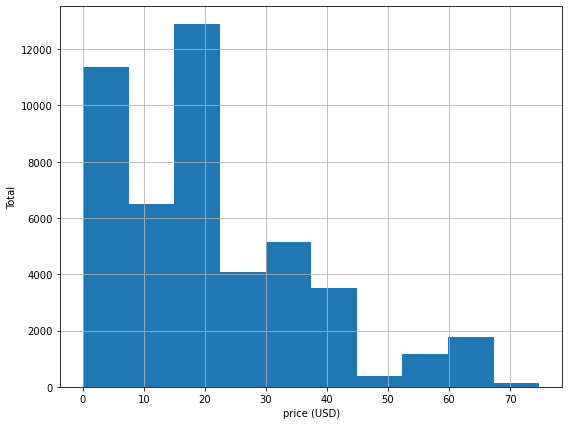

In [26]:
# Price histogram
plt.figure(figsize=(9,7))
csv["price_usd"].hist()
plt.xlabel("price (USD)")
plt.ylabel("Total")
plt.show()

In [27]:
# Fill in missing prices with average price
csv["price_usd"] = csv["price_usd"].fillna(csv["price_usd"].mean())

### Missing achievements

Most games on steam have a list of achievements that may be acquired by the player for completing certain objectives. Earning achievements does not directly affect gameplay. The median value will be the most appropriate number to fill in the missing data for the `achievements` column.

In [28]:
# Mean, standard deviation, and median values
csv["achievements"].describe()

count   47466.00
mean       65.34
std       124.73
min         0.00
25%         0.00
50%        43.00
75%        74.00
max      1354.00
Name: achievements, dtype: float64

In [29]:
# Fill missing data in achievements column
csv["achievements"] = csv["achievements"].fillna(csv["achievements"].median())

In [30]:
(csv.apply(pd.isnull).sum()/csv.shape[0] * 100).sort_values(ascending=False)

metacritic_url              50.42
dlc                         42.87
supported_audio             41.84
is_recurring_subscription   23.52
tags                         9.97
release_date                 9.87
genres                       9.66
short_description            9.22
supported_languages          9.22
developers                   9.22
publishers                   9.22
platforms                    9.22
categories                   9.22
owners                       9.22
total_negative               0.00
peak_players                 0.00
metacritic_score             0.00
app_id                       0.00
median_playtime              0.00
average_playtime             0.00
rating                       0.00
price_usd                    0.00
total_positive               0.00
review_score                 0.00
required_age                 0.00
game                         0.00
player_gain                  0.00
achievements                 0.00
average_players              0.00
player_gain_pe

### Total number of owners per game

For each game on the SteamSpy website, there is a section that describes the total number of estimated owners. Since this is an estimate, the values are ranges rather than exact numbers. 

Below I plotted the values below using the `.value_counts()` in conjunction with `.iloc`. Using iloc I reordered the values from the smallest range to the largest range. You can see that most games have been purchased by 1,000,000 to 2,000,000 people, or 2,000,000 to 5,000,000.

Instead of filling in the missing values of the `owners` column with the most frequent value, I went with the second highest value (1,000,000 - 2,000,000). While it's probable that some games have even greater number of owners, I did not want to over-estimate. Realistically this column may not be of much importance in the analysis but it might still help provide the overall picture of gaming trends over time.

Below, I renamed `owners` to `total_owners_estimated`, because the original name is slightly ambigious and at first may be difficult to understand what it means.


In [31]:
csv["owners"].value_counts()

2000000-5000000        13734
1000000-2000000        11760
500000-1000000          6964
5000000-10000000        5139
200000-500000           4270
10000000-20000000       2163
20000000-50000000       1373
100000-200000            826
0-20000                  408
50000000-100000000       313
50000-100000             311
100000000-200000000      120
20000-50000               85
Name: owners, dtype: int64

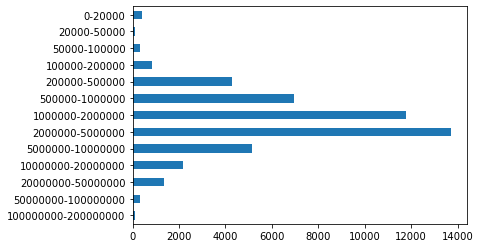

In [32]:
# Plot frequency of owners column
csv["owners"].value_counts().iloc[[8,12,10,7,4,2,1,0,3,5,6,9,11]].plot.barh() # Reorder by using iloc, smallest to greatest
plt.gca().invert_yaxis()
# 200,000 to 10,000,000

In [33]:
csv[csv["owners"].isnull()].drop_duplicates(subset="game",keep="first")

,month,average_players,peak_players,app_id,game,player_gain,player_gain_percentage,short_description,required_age,dlc,supported_languages,developers,publishers,platforms,categories,genres,achievements,release_date,supported_audio,price_usd,review_score,total_positive,total_negative,rating,owners,average_playtime,median_playtime,tags,metacritic_score,metacritic_url,is_recurring_subscription
240,2022-06-30,577605.19,885379,1599340,Lost Ark,88584.80,18.11,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.00,NaN,NaN,20.70,7.35,15987.00,1735.50,82.61,NaN,1636.00,566.00,NaN,81.23,NaN,NaN
502,2022-06-30,59315.62,105360,431960,Wallpaper Engine,3477.70,6.23,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.00,NaN,NaN,20.70,7.35,15987.00,1735.50,82.61,NaN,1636.00,566.00,NaN,81.23,NaN,NaN
2396,2022-06-30,1316.90,95120,1642370,Terra Nil Demo,1290.00,4800.82,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.00,NaN,NaN,20.70,7.35,15987.00,1735.50,82.61,NaN,1636.00,566.00,NaN,81.23,NaN,NaN
2628,2022-06-30,24670.44,49013,252950,Rocket League,-31.60,-0.13,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.00,NaN,NaN,20.70,7.35,15987.00,1735.50,82.61,NaN,1636.00,566.00,NaN,81.23,NaN,NaN
2713,2022-06-30,17577.69,32850,480,Spacewar,887.70,5.32,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.00,NaN,NaN,20.70,7.35,15987.00,1735.50,82.61,NaN,1636.00,566.00,NaN,81.23,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49213,2022-06-30,251.90,432,1624090,Football Manager 2022 Demo,10.50,4.35,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.00,NaN,NaN,20.70,7.35,15987.00,1735.50,82.61,NaN,1636.00,566.00,NaN,81.23,NaN,NaN
49413,2022-06-30,285.50,678,916440,Anno 1800,-95.30,-25.03,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.00,NaN,NaN,20.70,7.35,15987.00,1735.50,82.61,NaN,1636.00,566.00,NaN,81.23,NaN,NaN
49963,2022-06-30,231.18,644,1820120,Nobody - The Turnaround Demo,-38.20,-14.19,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.00,NaN,NaN,20.70,7.35,15987.00,1735.50,82.61,NaN,1636.00,566.00,NaN,81.23,NaN,NaN
51253,2022-06-30,256.55,488,71270,Football Manager 2012,-2.80,-1.06,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.00,NaN,NaN,20.70,7.35,15987.00,1735.50,82.61,NaN,1636.00,566.00,NaN,81.23,NaN,NaN


In [34]:
# Fill missing values
csv["owners"] = csv["owners"].fillna("1000000-2000000")

# Rename owners column
csv = csv.rename({"owners":"total_owners_estimated"},axis=1)

In [35]:
print("Total publishers:", csv["publishers"].nunique())
print("Total games:", csv["game"].nunique())
print("")
print("Publishers: Top 10")
print("")
print(csv["publishers"].value_counts().head(10))
print("")
print("Publishers: Bottom 10")
print("")
print(csv["publishers"].value_counts().tail(10))

Total publishers: 524
Total games: 997

Publishers: Top 10

['Ubisoft']                       1763
['Valve']                         1745
['Bethesda Softworks']            1528
['Paradox Interactive']           1138
['Electronic Arts']               1099
['SEGA']                           978
['Xbox Game Studios']              888
['Square Enix']                    877
['2K']                             619
['BANDAI NAMCO Entertainment']     595
Name: publishers, dtype: int64

Publishers: Bottom 10

['Tripwire Presents']                    1
['HIKARI FIELD']                         1
['Freedom Games']                        1
['Dotemu', 'Gamera Games']               1
['YAGER']                                1
['flanne', 'Erabit']                     1
['Live Motion Games', 'PlayWay S.A.']    1
['热区网络']                                 1
['MadJones']                             1
['2K Games']                             1
Name: publishers, dtype: int64


In [36]:
print("Total developers:", csv["developers"].nunique())
print("Total games:", csv["game"].nunique())
print("")
print("Developers: Top 10")
print("")
print(csv["developers"].value_counts().head(10))
print("")
print("Developers: Bottom 10")
print("")
print(csv["developers"].value_counts().tail(10))

Total developers: 684
Total games: 997

Developers: Top 10

['Valve']                                                                        1505
['Bethesda Game Studios']                                                         507
['Capcom']                                                                        489
['Ubisoft Montreal']                                                              478
['KOEI TECMO GAMES CO., LTD.']                                                    465
['Square Enix']                                                                   459
['Paradox Development Studio']                                                    452
['CREATIVE ASSEMBLY', 'Feral Interactive (Mac)', 'Feral Interactive (Linux)']     397
['CD PROJEKT RED']                                                                371
['CAPCOM Co., Ltd.']                                                              371
Name: developers, dtype: int64

Developers: Bottom 10

['flanne']               

In [37]:
csv.head()

,month,average_players,peak_players,app_id,game,player_gain,player_gain_percentage,short_description,required_age,dlc,supported_languages,developers,publishers,platforms,categories,genres,achievements,release_date,supported_audio,price_usd,review_score,total_positive,total_negative,rating,total_owners_estimated,average_playtime,median_playtime,tags,metacritic_score,metacritic_url,is_recurring_subscription
0,2022-06-30,570825.94,923996,730,Counter-Strike: Global Offensive,5864.20,1.04,Counter-Strike: Global Offensive (CS: GO) expa...,0.00,True,"['Bulgarian', 'Czech', 'Danish', 'Dutch', 'Eng...","['Valve', 'Hidden Path Entertainment']",['Valve'],"['windows', 'mac', 'linux']","['Multi-player', 'Steam Achievements', 'Full c...","['Action', 'Free to Play']",167.00,2012-08-21,[' English'],0.00,8.00,2949363.00,439344.00,86.63,50000000-100000000,30053.00,6104.00,"['FPS', 'Shooter', 'Multiplayer', 'Competitive...",83.00,https://www.metacritic.com/game/pc/counter-str...,False
1,2022-05-31,564961.70,923996,730,Counter-Strike: Global Offensive,-4021.46,-0.71,Counter-Strike: Global Offensive (CS: GO) expa...,0.00,True,"['Bulgarian', 'Czech', 'Danish', 'Dutch', 'Eng...","['Valve', 'Hidden Path Entertainment']",['Valve'],"['windows', 'mac', 'linux']","['Multi-player', 'Steam Achievements', 'Full c...","['Action', 'Free to Play']",167.00,2012-08-21,[' English'],0.00,8.00,2949363.00,439344.00,86.63,50000000-100000000,30053.00,6104.00,"['FPS', 'Shooter', 'Multiplayer', 'Competitive...",83.00,https://www.metacritic.com/game/pc/counter-str...,False
2,2022-04-30,568983.16,1013237,730,Counter-Strike: Global Offensive,-12506.53,-2.15,Counter-Strike: Global Offensive (CS: GO) expa...,0.00,True,"['Bulgarian', 'Czech', 'Danish', 'Dutch', 'Eng...","['Valve', 'Hidden Path Entertainment']",['Valve'],"['windows', 'mac', 'linux']","['Multi-player', 'Steam Achievements', 'Full c...","['Action', 'Free to Play']",167.00,2012-08-21,[' English'],0.00,8.00,2949363.00,439344.00,86.63,50000000-100000000,30053.00,6104.00,"['FPS', 'Shooter', 'Multiplayer', 'Competitive...",83.00,https://www.metacritic.com/game/pc/counter-str...,False
3,2022-03-31,581489.69,987993,730,Counter-Strike: Global Offensive,-53148.71,-8.37,Counter-Strike: Global Offensive (CS: GO) expa...,0.00,True,"['Bulgarian', 'Czech', 'Danish', 'Dutch', 'Eng...","['Valve', 'Hidden Path Entertainment']",['Valve'],"['windows', 'mac', 'linux']","['Multi-player', 'Steam Achievements', 'Full c...","['Action', 'Free to Play']",167.00,2012-08-21,[' English'],0.00,8.00,2949363.00,439344.00,86.63,50000000-100000000,30053.00,6104.00,"['FPS', 'Shooter', 'Multiplayer', 'Competitive...",83.00,https://www.metacritic.com/game/pc/counter-str...,False
4,2022-02-28,634638.40,995163,730,Counter-Strike: Global Offensive,32262.13,5.36,Counter-Strike: Global Offensive (CS: GO) expa...,0.00,True,"['Bulgarian', 'Czech', 'Danish', 'Dutch', 'Eng...","['Valve', 'Hidden Path Entertainment']",['Valve'],"['windows', 'mac', 'linux']","['Multi-player', 'Steam Achievements', 'Full c...","['Action', 'Free to Play']",167.00,2012-08-21,[' English'],0.00,8.00,2949363.00,439344.00,86.63,50000000-100000000,30053.00,6104.00,"['FPS', 'Shooter', 'Multiplayer', 'Competitive...",83.00,https://www.metacritic.com/game/pc/counter-str...,False


### Missing released dates

The last column that requires data cleaning is the column for the release dates of all the video games in the "steam_charts" dataset. I want to be able to group by the "release_date" column later on. With the `.groupby()` method it may be possible to see if there are any player trends or patterns based on when a game is released. However, some games are missing the release date, and it makes it more difficult to get an accurate representation of the data.

Unfortunately there isn't a simple fix for this. We can't just get the mean or the median of this column and fill in with that value. I could just fill in the date with the most common value, or something else. The problem with this approach is it distorts the true picture of the data. 

I had to manually search all 129 games that were missing release dates. This process took about an hour, but I feel that it is worth the time, because this should accurately portray the data. I created a dictionary with each unique game being a key with the attached value being the release date. Generally, all the dates are correct with a few guesses. Some games in this dictionary were not available to look up on Steam's storefront in my region, most notably Chinese or Japanese titles. Even a Google search produced ambigious dates for these titles, so I made the best estimate I could.

During this search I noticed that "Spacewar" is not a true Steam title. It is used as a proxy for people to put pirated games onto steam. This title will be removed from the dataset. There are several titles that are demos. Game demos are "free samples" for people to try out and see whether they want to purchase the full version. I'm not interested in analyzing the trends of game demos for the reason that they are not the full version, and may not even have been released yet. Along with "Spacewar", any game demos will be removed.

In [38]:
dict = {
 'Lost Ark': "February 11, 2022",
 'Wallpaper Engine': "November 1, 2018",
 'Terra Nil Demo': "June 16, 2021",
 'Rocket League': "July 7, 2015",
 'Spacewar': "February 14, 1962",
 'tModLoader': "May 16, 2020",
 '雀魂麻将(MahjongSoul)': "January 1, 2018",
 'Soundpad': "September 30, 2017",
 'FINAL FANTASY VII REMAKE INTERGRADE': "June 17, 2022",
 '20 Minutes Till Dawn': "June 8, 2022",
 "Teenage Mutant Ninja Turtles: Shredder's Revenge": "June 16, 2022",
 "Conqueror's Blade": "May 30, 2019",
 'Starship Troopers: Terran Command': "June 16, 2022",
 'Monster Hunter Rise: Sunbreak Demo':"June 16, 2022",
 'VEILED EXPERTS GLOBAL BETA': "June 13, 2022",
 'VTube Studio':"March 12, 2021",
 'Blender': "April 24, 2015",
 'Taiko Risshiden V DX': "December 23, 2015",
 'YoloMouse': "May 1, 2020",
 '小黑盒加速器': "May 24, 2021",
 'The Elder Scrolls V: Skyrim': "November 11, 2011",
 'Phantasy Star Online 2 New Genesis': "August 5, 2020",
 'OBS Studio':"March 21, 2022",
 '弈仙牌 Demo':"May 26, 2022",
 'DEAD OR ALIVE Xtreme Venus Vacation':"November 15, 2017",
 'MyDockFinder':"November 25, 2021",
 "Don't Starve":"April 23, 2013",
 'Total War: SHOGUN 2':"March 15, 2011",
 'Crosshair X':"August 17, 2020",
 'SAO Utils: Beta':"March 14, 2018",
 'Aseprite':"February 22, 2016",
 'R2Beat: 音速觉醒':"April 7, 2022",
 'Grand Theft Auto IV: The Complete Edition':"March 24, 2020",
 'Symphony of War: The Nephilim Saga':"June 10, 2022",
 '封灵档案/Soul Dossier':"March 29, 2021",
 'OVR Advanced Settings':"April 14, 2020",
 'NBA 2K20':"September 6, 2019",
 'Neon White':"June 16, 2022",
 'SoulWorker':"May 12, 2021",
 'LastCloudiaTc':"February 17, 2021",
 "Assassin's Creed IV Black Flag":"November 19, 2013",
 'Bless Unleashed':"August 6, 2021",
 'PrprLive':"May 14, 2020",
 'Cult of the Lamb Demo':"August 11, 2022",
 'ShareX':"October 2, 2015",
 'Pacifish':"June 7, 2022",
 'Myth of Empires':"November 18, 2021",
 'Soundpad Demo':"October 4, 2017",
 'FaceRig':"Nov 17, 2021",
 'Terra Invicta Demo':"January 1, 2022",
 'Brotato Demo':"May 2, 2022",
 'RPG Maker MV':"Oct 23, 2015",
 'EVGA Precision X1':"July 16, 2014",
 'Source Filmmaker':"July 10, 2012",
 'Stream Avatars':"May 5, 2022",
 'Potion Permit Demo':"June 13, 2022",
 'Animaze':"November 17, 2021",
 'Hatsune Miku: Project DIVA Mega Mix+':"May 26, 2022",
 'DEATH STRANDING':"March 1, 2022",
 'XSOverlay':"March 3, 2020",
 '大侠请重来':"June 14, 2022",
 'SAO Utils 2: Progressive':"May 2, 2022",
 'Grand Theft Auto: San Andreas':"January 1, 2020",
 'FINAL FANTASY XIV Online Free Trial':"November 5, 2014",
 'Fallout: New Vegas PCR':"October 20, 2010",
 'Black Desert Online SA':"November 15, 2017",
 'Tree of Savior (Japanese Ver.)':"November 28, 2019",
 'Downfall - A Slay the Spire Fan Expansion':"March 25, 2022",
 'VRoid Studio':"December 23, 2020",
 'LAST CLOUDIA':"August 30, 2021",
 'NBA 2K19':"September 7, 2018",
 'Smart Game Booster':"May 12, 2020",
 "NOBUNAGA'S AMBITION: Souzou with Power Up Kit":"July 21, 2015",
 'OVR Toolkit':"June 28, 2019",
 '月に寄りそう乙女の作法':"June 17, 2022",
 'Live2DViewerEX':"December 31, 2021",
 'Euro Truck Simulator 2 Demo':"February 8, 2013",
 'The Chronicles Of Myrtana: Archolos':"December 10, 2021",
 'Romance of the Three Kingdoms Hadou [JP]':"January 15, 2020",
 'Metro Exodus Enhanced Edition':"May 6, 2021",
 'DEAD OR ALIVE Xtreme Venus Vacation [JP]':"November 15, 2017",
 'Action! - Gameplay Recording and Streaming':"May 8, 2014",
 'Spider Slingers Demo':"May 8, 2014",
 'Metal: Hellsinger Demo':"June 8, 2022",
 'HudSight - custom crosshair overlay':"June 5, 2021",
 'RPG Maker MZ':"April 27, 2020",
 'Borderless Gaming':"June 23, 2015",
 'STALCRAFT Demo':"June 13, 2022",
 'Driver Booster for Steam':"November 1, 2018",
 '3DMark':"February 12, 2013",
 'ESEA':"July 8, 2016",
 'HypeSquad Demo':"May 15, 2022",
 '崩坏3':"February 22, 2017",
 'Dome Keeper Demo':"February 14, 2022",
 'BattleBit Remastered Playtest':"January 1, 2022",
 'Call of Duty: Modern Warfare 3':"November 8, 2011",
 'DELTARUNE (Chapter 1 & 2 DEMO)':"September 17, 2021",
 'RutonyChat':"September 19, 2016",
 'SMASH LEGENDS':"April 13, 2021",
 'Warhammer 40,000: Dawn of War II - Retribution':"March 1, 2011",
 '崩壊3rd':"February 22, 2017",
 'CPUCores :: Maximize Your FPS':"July 6, 2015",
 'Call of Duty: Black Ops II - Zombies':"November 13, 2012",
 'Souldiers':"June 2, 2022",
 'Enderal: Forgotten Stories (Special Edition)':"April 2, 2021",
 'Zula Türkiye':"January 28, 2022",
 '古剑奇谭网络版 海外版':"January 1, 2020",
 'Anno 1800':"April 16, 2019",
 'Nobody - The Turnaround Demo':"February 21, 2022",
 '阿瑞斯病毒2':"June 9, 2022",
 'Video Horror Society Playtest':"January 1, 2022",
 'Football Manager 2021':"November 10, 2020",
 'Football Manager 2020':"October 31, 2019",
 'eFootball PES 2021 SEASON UPDATE':"September 15, 2020",
 'Football Manager 2019':"November 2, 2018",
 'Winning Post 9 2022':"March 30, 2022",
 'Football Manager 2018':"November 10, 2017",
 'Football Manager 2017':"November 4, 2016",
 'eFootball PES 2020':"September 10, 2019",
 'Football Manager 2016':"November 13, 2015",
 'F1 2018':"August 24, 2018",
 'Football Manager 2015':"November 7, 2014",
 'Football Manager 2022 Editor':"November 8, 2022",
 'Football Manager 2021 Touch':"November 10, 2020",
 'Football Manager 2014':"October 30, 2013",
 'F1 2019':"June 25, 2019",
 'Call of Duty: Modern Warfare 2 (2009) - Multiplayer':"November 12, 2009",
 'Football Manager 2022 Demo':"January 1, 2022",
 'Football Manager 2012':"October 20, 2011"
}

In [39]:
# Utilize dictionary values to fill missing release dates
csv["release_date"] = csv["release_date"].fillna(csv["game"].map(dict)) # dictionary keys are games, map these keys to the "game" column

# Converts release date values to a datetime object for consistency
csv["release_date"] = pd.to_datetime(csv["release_date"])

In [40]:
csv["release_date"]

0       2012-08-21
1       2012-08-21
2       2012-08-21
3       2012-08-21
4       2012-08-21
           ...    
52279   2020-02-06
52280   2020-02-06
52281   2020-02-06
52282   2020-02-06
52283   2020-02-06
Name: release_date, Length: 52284, dtype: datetime64[ns]

In [41]:
# Drop Spacewar game
csv = csv[csv["game"] != "Spacewar"]

In [42]:
# Filters out all rows that contain "Demo" or "DEMO"
# Use tilde key to select the opposite of all rows containing "Demo|DEMO"
csv = csv[~csv["game"].str.contains("Demo|DEMO")]

## Changelog for `steam_charts_combined.csv` data

July 21, 2022
### Changes
    - Dropped "coming_soon" column
    - Renamed "average_forever" column to "average_playtime"
    - Renamed "median_forever" column to "median_playtime"
    - Renamed "owners" column to "total_owners_estimated"
    - Dropped rows with "Spacewar" game and any rows with "Demo" or "DEMO"

### Fixes
    - Missing values in "metacritic_score" column set to average metacritic score value
    - Rows with missing "age" values set to 0, age-appropriate for all players
    - Missing values in "total_positive" column set to median value of that column
    - Missing values in "total_negative" column set to median value of that column
    - Missing values in "review_score" column set to average review score value
    - Missing values in "rating" column set to average rating value
    - Missing values in "average_playtime" set to median value of that column
    - Missing values in "median_playtime" set to median value of that column
    - Missing values in "price_usd" set to average price (USD)
    - Missing values in "achievements" set to median value of that column
    - Missing values in "total_owners_estimated" set to "1000000-2000000"
    - Replaced missing release dates with a set of dictionary values

In [43]:
# Creates a final csv file of the cleaned data
#csv.to_csv("steam_charts_final.csv",index=False)

In [48]:
# Globabl stats for twitch viewership, does not include game titles
twitch_global = pd.read_csv(r"data_files\Twitch_global_data.csv")

# Individual game stats
twitch_game = pd.read_csv(r"data_files\Twitch_game_data.csv",encoding = "ISO-8859-1")

In [50]:
twitch_global

,year,Month,Hours_watched,Avg_viewers,Peak_viewers,Streams,Avg_channels,Games_streamed
0,2016,1,480241904,646355,1275257,7701675,20076,"12,149"
1,2016,2,441859897,635769,1308032,7038520,20427,"12,134"
2,2016,3,490669308,660389,1591551,7390957,20271,"12,234"
3,2016,4,377975447,525696,1775120,6869719,16791,"12,282"
4,2016,5,449836631,605432,1438962,7535519,19394,"12,424"
...,...,...,...,...,...,...,...,...
67,2021,8,1974586275,2657585,4778502,20767741,100701,"36,471"
68,2021,9,1857514531,2583469,5599210,18826493,95513,"35,861"
69,2021,10,2020197953,2718974,6086487,18209793,91858,"36,406"
70,2021,11,1812117484,2520330,5941684,17415525,90774,"35,043"


In [53]:
twitch_game

,Rank,Game,Month,Year,Hours_watched,Hours_Streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio
0,1,League of Legends,1,2016,94377226,1362044 hours,530270,2903,129172,127021,1833,69.29
1,2,Counter-Strike: Global Offensive,1,2016,47832863,830105 hours,372654,2197,120849,64378,1117,57.62
2,3,Dota 2,1,2016,45185893,433397 hours,315083,1100,44074,60815,583,104.26
3,4,Hearthstone,1,2016,39936159,235903 hours,131357,517,36170,53749,317,169.29
4,5,Call of Duty: Black Ops III,1,2016,16153057,1151578 hours,71639,3620,214054,21740,1549,14.03
...,...,...,...,...,...,...,...,...,...,...,...,...
14395,196,Garry's Mod,12,2021,630902,21753 hours,24951,99,3537,849,29,29.00
14396,197,Call of Duty: Black Ops Cold War,12,2021,622497,223641 hours,26559,654,25366,837,300,2.78
14397,198,Noita,12,2021,620983,13935 hours,27826,41,1961,835,18,44.56
14398,199,Pro Soccer Online,12,2021,619859,606 hours,36182,20,84,834,0,1022.87


In [55]:
twitch_game.head(10)

,Rank,Game,Month,Year,Hours_watched,Hours_Streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio
0,1,League of Legends,1,2016,94377226,1362044 hours,530270,2903,129172,127021,1833,69.29
1,2,Counter-Strike: Global Offensive,1,2016,47832863,830105 hours,372654,2197,120849,64378,1117,57.62
2,3,Dota 2,1,2016,45185893,433397 hours,315083,1100,44074,60815,583,104.26
3,4,Hearthstone,1,2016,39936159,235903 hours,131357,517,36170,53749,317,169.29
4,5,Call of Duty: Black Ops III,1,2016,16153057,1151578 hours,71639,3620,214054,21740,1549,14.03
5,6,Minecraft,1,2016,10231056,490002 hours,64432,1538,88820,13769,659,20.88
6,7,World of Warcraft,1,2016,8771452,342978 hours,46130,1180,33375,11805,461,25.57
7,8,Z1: Battle Royale,1,2016,7894571,205569 hours,41588,460,21396,10625,276,38.40
8,9,Talk Shows & Podcasts,1,2016,7688369,53235 hours,84051,148,10779,10347,71,144.42
9,10,FIFA 16,1,2016,6988475,203646 hours,145728,756,46462,9405,274,34.32
